In [1]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt

from deepcell_spots.applications import SpotDetection

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
data_dir = '../data/example_images/'

In [3]:
MERFISH_files = glob.glob(data_dir + 'MER*')
MERFISH_image = imageio.volread(MERFISH_files[0])
np.shape(MERFISH_image)

(1, 2048, 2048, 1)

In [4]:
ISS_files = glob.glob(data_dir + 'ISS*')
ISS_image = imageio.volread(ISS_files[0])
np.shape(ISS_image)

(1, 1044, 1390, 1)

In [5]:
AML_files = glob.glob(data_dir + 'AML*')
AML_image = imageio.volread(AML_files[0])
AML_image = np.expand_dims(AML_image, axis=[0,-1])
np.shape(AML_image)

(1, 2048, 2048, 1)

In [6]:
SeqFISH_files = glob.glob(data_dir + 'Pos*')
SeqFISH_image = imageio.volread(SeqFISH_files[0])
SeqFISH_image = np.expand_dims(SeqFISH_image, axis=[0,-1])
np.shape(SeqFISH_image)

(1, 2048, 2048, 1)

In [28]:
TbMovie_files = glob.glob(data_dir + 'Sun*')
TbMovie_files

['../../example_images/SunTag_virus_movie.tif']

In [32]:
im_stack = imageio.volread(TbMovie_files[0])
TbMovie = np.array(im_stack)[40]
TbMovie = np.expand_dims(TbMovie, axis=[0,-1])
np.shape(TbMovie)

(1, 384, 256, 1)

In [8]:
# instantiate version of spot detection app without post-processing of output images to coordinates
app = SpotDetection()
app.postprocessing_fn = None

# instantiate full version of the spot detection app
coords_app = SpotDetection()

2022-10-25 23:43:43.944498: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 23:43:44.553635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10415 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:06:00.0, compute capability: 6.1


In [9]:
MERFISH_pred = app.predict(MERFISH_image, clip=True)
MERFISH_coords = coords_app.predict(MERFISH_image, clip=True)

2022-10-25 23:44:01.092536: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


In [11]:
ISS_pred = app.predict(ISS_image, clip=True)
ISS_coords = coords_app.predict(ISS_image, clip=True)

In [13]:
SeqFISH_pred = app.predict(SeqFISH_image,
                           clip=True)
SeqFISH_coords = coords_app.predict(SeqFISH_image,
                                    clip=True)

In [15]:
splitFISH_pred = app.predict(AML_image,
                             clip=True)
splitFISH_coords = coords_app.predict(AML_image,
                                      clip=True)

In [33]:
TbMovie_pred = app.predict(TbMovie)
# model was not trained for this data type, so using a looser threshold
TbMovie_coords = coords_app.predict(TbMovie, threshold=0.7)

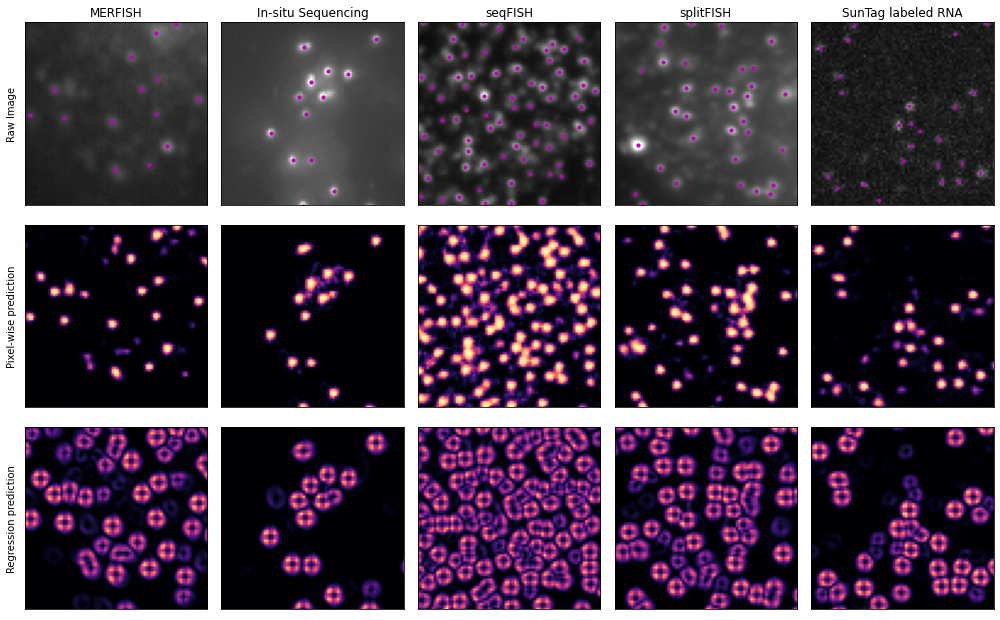

In [35]:
s=10
fig, ax = plt.subplots(3,5,figsize=(14,8.8))

ax[0,0].imshow(MERFISH_image[0,...,0], cmap='gray')
ax[0,0].scatter(MERFISH_coords[0][:,1], MERFISH_coords[0][:,0], c='m', s=s)
ax[1,0].imshow(MERFISH_pred['classification'][0,...,1], cmap='magma')
ax[2,0].imshow(MERFISH_pred['offset_regression'][0,...,0]**2 + MERFISH_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,0].set_title('MERFISH')
ax[0,0].set_ylabel('Raw Image')
ax[1,0].set_ylabel('Pixel-wise prediction')
ax[2,0].set_ylabel('Regression prediction')

for i in range(np.shape(ax)[0]):
    ax[i,0].set_xlim([800,875])
    ax[i,0].set_ylim([1200,1125])
    
ax[0,1].imshow(ISS_image[0,...,0], cmap='gray')
ax[0,1].scatter(ISS_coords[0][:,1], ISS_coords[0][:,0], c='m', s=s)
ax[1,1].imshow(ISS_pred['classification'][0,...,1], cmap='magma')
ax[2,1].imshow(ISS_pred['offset_regression'][0,...,0]**2 + ISS_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,1].set_title('In-situ Sequencing')
for i in range(np.shape(ax)[0]):
    ax[i,1].set_xlim([775,850])
    ax[i,1].set_ylim([1000,925])
    
ax[0,2].imshow(SeqFISH_image[0,...,0], cmap='gray', vmax=5000)
ax[0,2].scatter(SeqFISH_coords[0][:,1], SeqFISH_coords[0][:,0], c='m', s=s)
ax[1,2].imshow(SeqFISH_pred['classification'][0,...,1], cmap='magma')
ax[2,2].imshow(SeqFISH_pred['offset_regression'][0,...,0]**2 + SeqFISH_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,2].set_title('seqFISH')
for i in range(np.shape(ax)[0]):
    ax[i,2].set_xlim([200,275])
    ax[i,2].set_ylim([1200,1125])
    
ax[0,3].imshow(AML_image[0,...,0], cmap='gray', vmax=25000)
ax[0,3].scatter(splitFISH_coords[0][:,1], splitFISH_coords[0][:,0], c='m', s=s)
ax[1,3].imshow(splitFISH_pred['classification'][0,...,1], cmap='magma')
ax[2,3].imshow(splitFISH_pred['offset_regression'][0,...,0]**2 + splitFISH_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,3].set_title('splitFISH')
for i in range(np.shape(ax)[0]):
    ax[i,3].set_xlim([1025,1100])
    ax[i,3].set_ylim([700,775])
    
ax[0,4].imshow(TbMovie[0,...,0], cmap='gray', vmax=800)
ax[0,4].scatter(TbMovie_coords[0][:,1], TbMovie_coords[0][:,0], c='m', s=s-3)
ax[1,4].imshow(TbMovie_pred['classification'][0,...,1], cmap='magma')
ax[2,4].imshow(TbMovie_pred['offset_regression'][0,...,0]**2 + TbMovie_pred['offset_regression'][0,...,1]**2,
               cmap='magma')
ax[0,4].set_title('SunTag labeled RNA')
for i in range(np.shape(ax)[0]):
    ax[i,4].set_xlim([0,75])
    ax[i,4].set_ylim([250,325])
    
for i in range(np.shape(ax)[0]):
    for ii in range(np.shape(ax)[1]):
        ax[i,ii].set_xticks([])
        ax[i,ii].set_yticks([])
    
plt.tight_layout()
plt.show()